# Analysis on Netflix Movies & TV Shows
Netflix is a popular service that people across the world use for entertainment. In this EDA, I will explore the netflix-shows dataset through visualizations and graphs using matplotlib and seaborn.

Package Install and Import
First, we will install and import necessary packa
ges.

In [2]:
import matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Read the csv file to create a Dataframe

In [58]:
netflix_df = pd.read_csv(r'C:\Work_Directory\Python_Projects\Python_DS_ML\EDA_Projects\Netflix_EDA\input\netflix_2021.csv')

In [59]:
netflix_df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Missing Values information

In [60]:
missing_info = netflix_df.isnull().sum()
missing_info 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [61]:
missing_info_percent = (netflix_df.isnull().sum()/len(netflix_df))*100.0
missing_info_percent

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [62]:
miss_pd = pd.concat([missing_info,missing_info_percent], axis=1, keys=['Total','Missing%'])
miss_pd

Total   Missing%
show_id           0   0.000000
type              0   0.000000
title             0   0.000000
director       2634  29.908028
cast            825   9.367549
country         831   9.435676
date_added       10   0.113546
release_year      0   0.000000
rating            4   0.045418
duration          3   0.034064
listed_in         0   0.000000
description       0   0.000000

### Heat Map of Missing values

<Axes: >

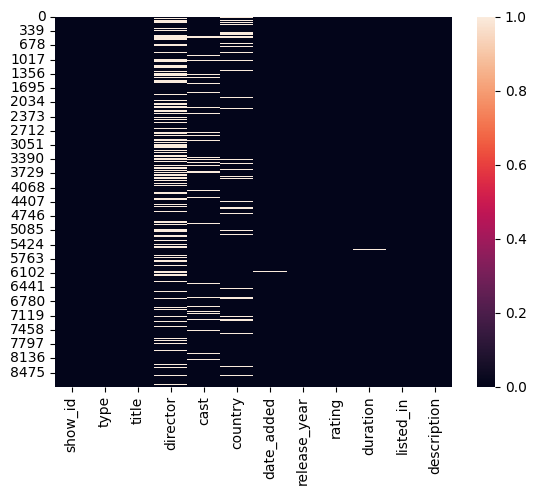

In [63]:
sns.heatmap(netflix_df.isnull())

#### Adding unavailable data as unavailable

In [64]:
netflix_df['director'].fillna(value="Director N/A", inplace=True)
netflix_df['cast'].fillna(value="Cast N/A", inplace=True)
netflix_df['country'].fillna(value="Country N/A", inplace=True)
netflix_df['date_added'].fillna(value="Date_Added N/A", inplace=True)
netflix_df['duration'].fillna(value="Duration N/A", inplace=True)
netflix_df['rating'].fillna(value="Rating N/A", inplace=True)

In [53]:
import ydata_profiling as prf

In [66]:
netflix_profile = prf.ProfileReport(netflix_df)

In [67]:
netflix_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Splitting the Dataset
Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [68]:
netflix_df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water     Director N/A   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans     Director N/A   
4      s5  TV Show           Kota Factory     Director N/A   

                                                cast        country  \
0                                           Cast N/A  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...    Country N/A   
3                                           Cast N/A    Country N/A   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [69]:
netflix_movie_df = netflix_df[netflix_df['type'] == 'Movie']

In [72]:
netflix_tvshow_df = netflix_df[netflix_df['type'] == 'TV Show']

## Netflix Film Types: Movie or TV Show¶
It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

<Axes: xlabel='type', ylabel='count'>

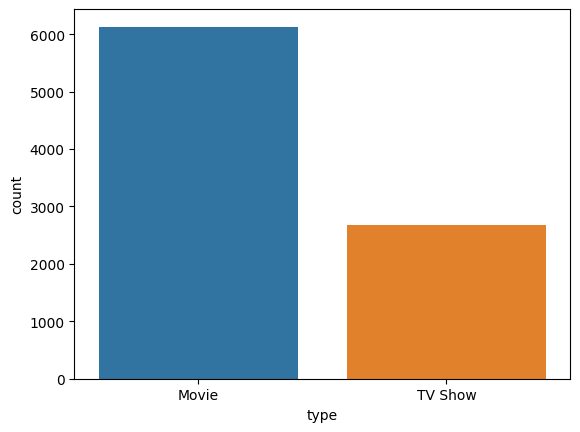

In [82]:
sns.countplot(netflix_df,x='type')

([<matplotlib.patches.Wedge at 0x240059c5070>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')],
 [Text(-0.3467755974619939, 0.4896393417658319, '69.6%'),
  Text(0.3467755974619938, -0.48963934176583196, '30.4%')])

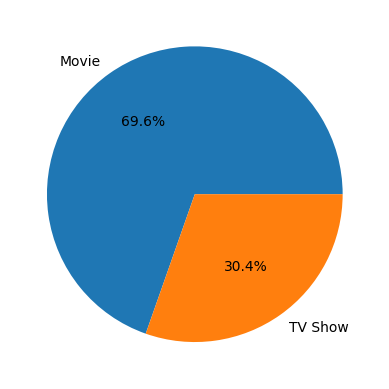

In [96]:
plt.pie(netflix_df['type'].value_counts(),labels=netflix_df['type'].value_counts().index,autopct='%1.1f%%')